Troy Mazerolle

Student Number 8972394

# Lab 5 - Cross-Validation for Model Selection

## 0. Set Up

In [6]:
# Utility Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Sci-Kit Learn
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Utilize the diabetes dataset from lab 4. Perform cross-validation on nine polynomial models, ranging from degree 0 to 8.

For k-fold cross-validation, I will choose $k = floor(\sqrt{n})$, where $n$ is the number of observations in the dataset.

Since part 2 asks for a table of error metrics, we will construct that table while performing the cross validation in this part.  We will make a dataframe called `accuracy_results` and initialize it with values of 0 in all of its columns to be filled in later.  

We will be performing cross validation on polynomial models ranging from degree 0 to 8.  We will use a for loop to accomplish this.  During each iteration, the loop will
* Transform the data into the appropriate degree
* Perform the cross validation via the cross_val_score function, collection the error result for each k-fold
  * Do this for the $R^2$ score, $MAE$, and $MAPE$
* Take the average of the metrics and store the value into the corresponding spot in the `accuracy_results` table
* Take the standard deviation of the metrics and store the value into the corresponding spot in the `accuracy_results` table

In [2]:
# Loading in data
X, y = datasets.load_diabetes(as_frame = True, scaled = False, return_X_y = True)

# Defining CV variables
k = int(np.floor(np.sqrt(len(X))))
degrees = np.arange(0, 9) # hyperparameters
k_folds = KFold(n_splits = k, random_state = 8972394, shuffle = True)

accuracy_results = pd.DataFrame({"degree": degrees,
                                 "r2_mean": np.zeros(len(degrees)),
                                 "r2_std": np.zeros(len(degrees)),
                                 "mae_mean": np.zeros(len(degrees)),
                                 "mae_std": np.zeros(len(degrees)),
                                 "mape_mean": np.zeros(len(degrees)),
                                 "mape_std": np.zeros(len(degrees))})

for i in range(len(degrees)):

    linmod = linear_model.LinearRegression()
    polyFeats = PolynomialFeatures(degree = accuracy_results['degree'][i])
    X_transformed = polyFeats.fit_transform(X)
    
    r2_scores = cross_val_score(linmod, X_transformed, y, scoring = "r2", cv = k_folds)
    mae_scores = abs(cross_val_score(linmod, X_transformed, y, scoring = "neg_mean_absolute_error", cv = k_folds))
    mape_scores = abs(cross_val_score(linmod, X_transformed, y, scoring = "neg_mean_absolute_percentage_error", cv = k_folds))
    
    accuracy_results['r2_mean'][i] = np.mean(r2_scores)
    accuracy_results['r2_std'][i] = np.std(r2_scores)
    accuracy_results['mae_mean'][i] = np.mean(mae_scores)
    accuracy_results['mae_std'][i] = np.std(mae_scores)
    accuracy_results['mape_mean'][i] = np.mean(mape_scores)
    accuracy_results['mape_std'][i] = np.std(mape_scores)

    # Counter to track progress of loop
    print("Degree" , i , "COMPLETE")


Degree 0 COMPLETE
Degree 1 COMPLETE
Degree 2 COMPLETE
Degree 3 COMPLETE
Degree 4 COMPLETE
Degree 5 COMPLETE
Degree 6 COMPLETE
Degree 7 COMPLETE
Degree 8 COMPLETE


## 2. Construct a table summarizing the cross-validation results

The table was constructed in part 1, but we will output the results here.

In [3]:
accuracy_results

,degree,r2_mean,r2_std,mae_mean,mae_std,mape_mean,mape_std
0,0,-0.069115,0.088544,65.978626,7.639043,0.622804,0.128779
1,1,0.451132,0.169061,44.429898,7.172733,0.396387,0.085454
2,2,-2.142723,2.472081,90.088600,35.933714,0.746313,0.278036
3,3,-14.483253,17.641000,179.940336,59.054568,1.436980,0.591706
4,4,-864.580019,2546.193598,717.555456,351.231133,5.141897,3.135217
5,5,-970.974325,2455.093930,705.679397,500.029301,5.181164,3.810723
6,6,-2942.628764,8502.763838,871.513534,851.581315,6.624129,7.961703
7,7,-6842.151589,21909.775684,1141.130795,1276.752897,8.885537,12.972677
8,8,-11855.291864,40993.331599,1473.142745,1682.507397,11.722855,17.869101


## 3. Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared, MAE and MAPE metrics

Clearly the degree 1 model is the strongest.  It has the highest $R^2$ and lowest $MAE$ and $MAPE$ of all models.  

## 4. Additional analysis and interpretation of the models' performances

Below are the plots that Disease Progression One Year after Baseline (y) creates with each feature.

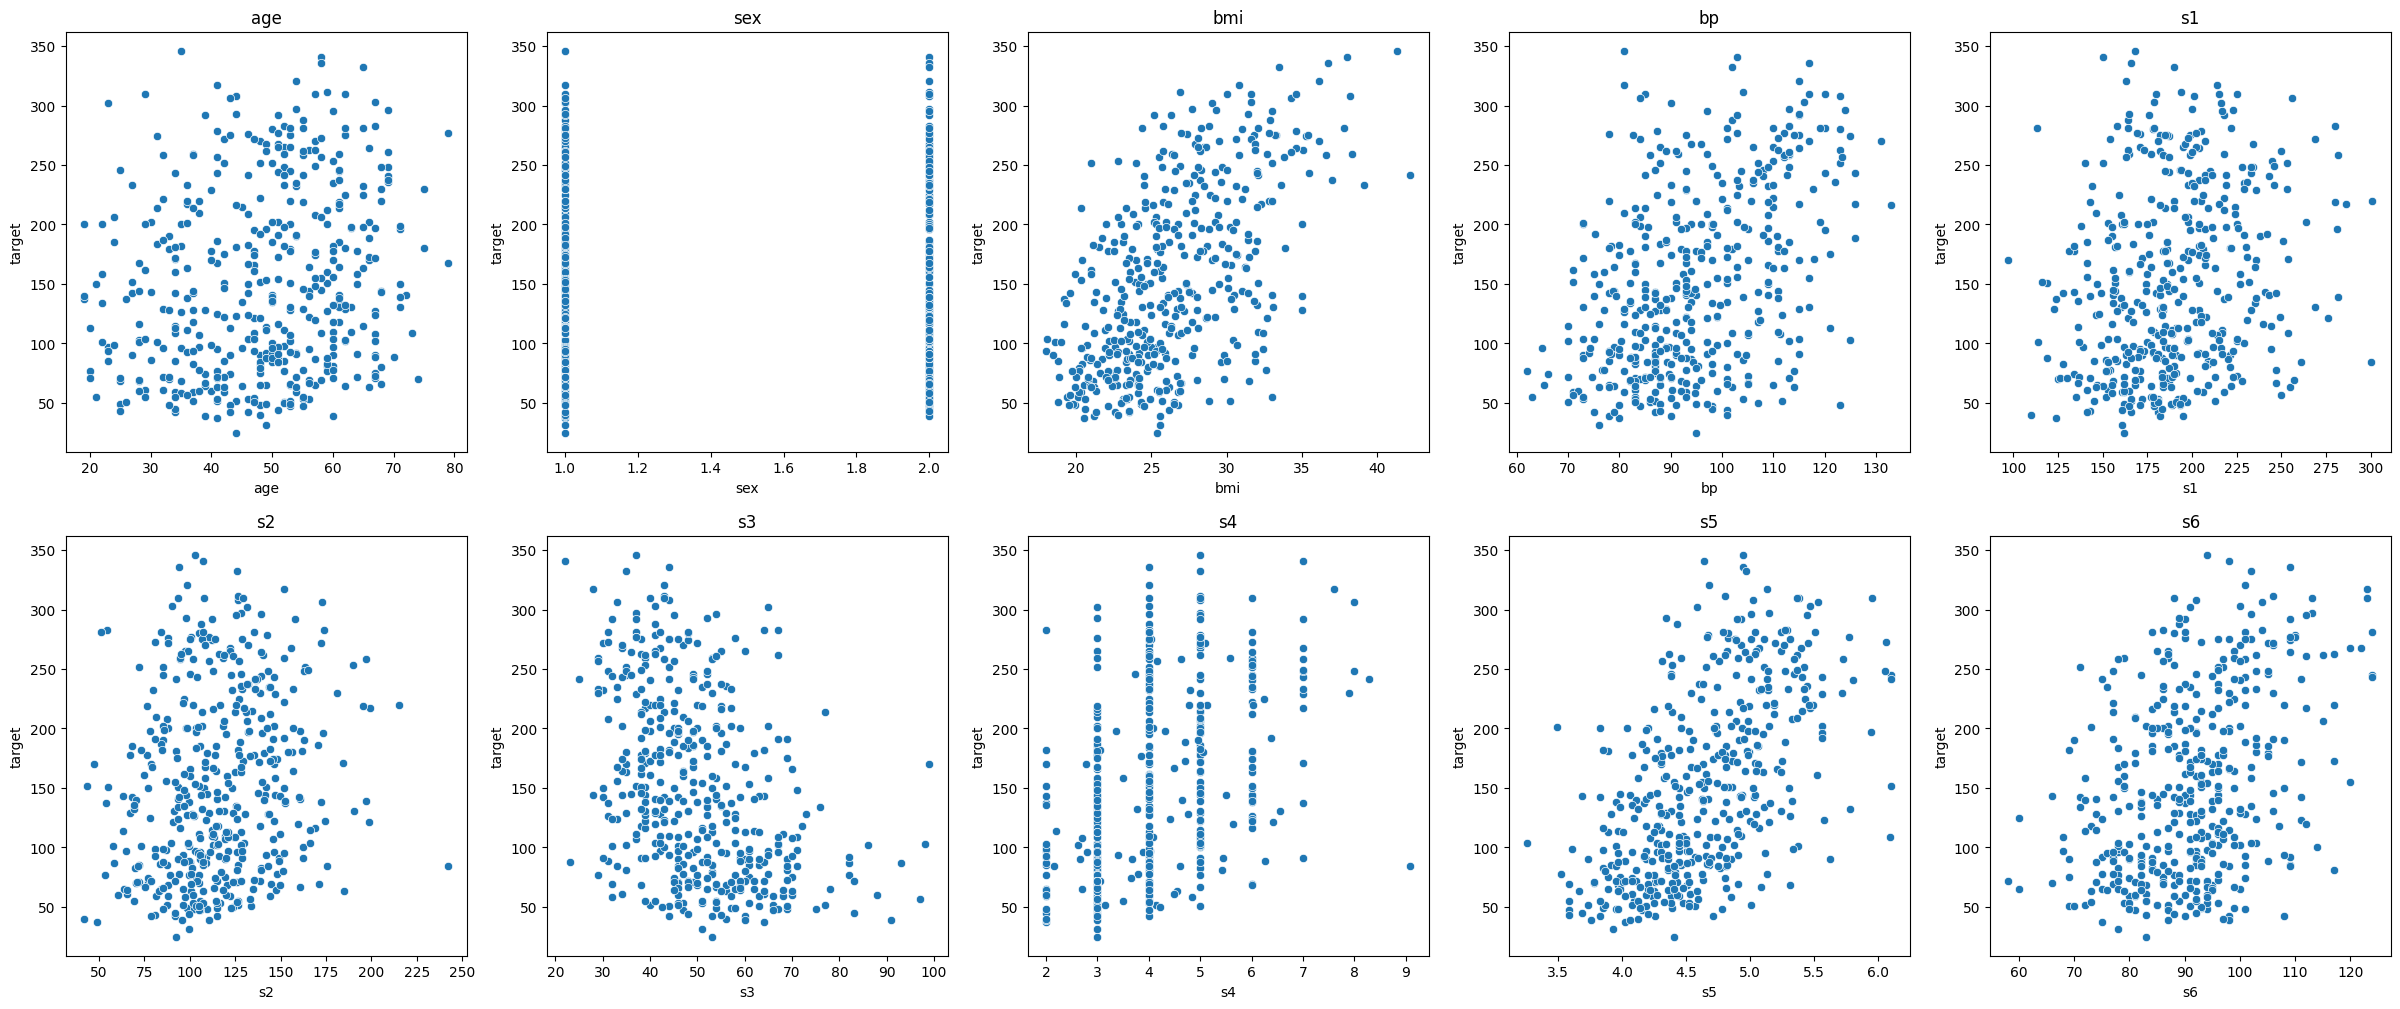

In [22]:
fig, plots = plt.subplots(2, 5, figsize = (30,12))
for i in range(X.shape[1]):
    sns.scatterplot(x = X[X.columns[i]], y = y, ax = plots[i // 5, i % 5]).set_title(X.columns[i])

Based on what we can see above, there does not seem to be a need to use a polynomial larger than degree 1 since most of the relationships are linear (for the features that show a relationship, at least).  In the previous lab we saw how a degree 2 model overfit the model when it produced worse test errors despite having better training errors.  In this lab, we took the test errors for polynomial models up to degree 8, and observed how the errors got worse with every degree, because adding more "accuracy" to the training model in the form of a higher degree polynomial takes away accuracy from the test data.

Let us look at the trend in $R^2$.

Text(0, 0.5, 'R2')

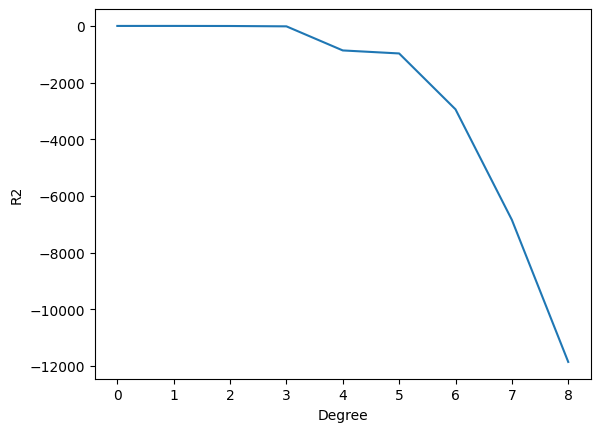

In [28]:
plt.plot(accuracy_results['degree'], accuracy_results['r2_mean'])
plt.xlabel("Degree")
plt.ylabel("R2")

It is difficult to see that degree = 1 is the optimal point on this graph, but it can be verified by looking at the table.  degree = 1 is also the only positive $R^2$ value, sitting at about 0.45.  $R^2 < 0$ is an interesting result, because it means that simply taking the average of disease progression and using that as the prediction is more accurate than what the model produces.  